In [1]:
# dependencies
import os
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

In [2]:
# Call VGGFace model
model_name = "Facenet"
model = DeepFace.build_model(model_name)

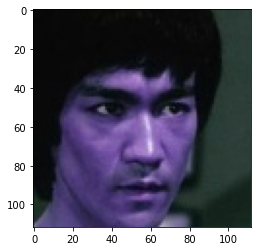

In [3]:
# Split the list to get a subsample of our faces to act as database
#X_train, X_test = train_test_split(all_files, test_size=0.99, random_state=1)
# test_size 0.999 gives a train size of 490 random faces
#print(len(X_train))
#database = X_train

# Validate Images
input_face_name = 'CASIA-WebFace/images/490624/490624_2.jpg'
input_face = cv2.imread(input_face_name)
plt.imshow(input_face)

In [4]:
######################################################
# DATA LOADING
######################################################


###############################
# PLAIN FACES
###############################

# how many faces / folders should we use as database
n_faces = 1
n_max_images_per_face = 10

# Load all filenames into a list
path = 'CASIA-WebFace/images/' 
plain_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        plain_faces.append(str(root) + "/" + str(name))
        j += 1
        
    i += 1
        
print("loaded %d files from %d plain face(s)" % (len(plain_faces), n_faces))
print("Example: %s" % plain_faces[0])
print("----------------------------------")

###############################
# ENCRYPTED FACES L
###############################

# Load all filenames into a list
path = 'l_w4o6_CASIA-WebFace/images/' 
encrypted_l_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_l_faces.append(str(root) + "/" + str(name))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted l face(s)" % (len(encrypted_l_faces), n_faces))
print("Example: %s" % encrypted_l_faces[0])
print("----------------------------------")

###############################
# ENCRYPTED FACES R
###############################

# Load all filenames into a list
path = 'r_w4o6_CASIA-WebFace/images/' 
encrypted_r_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_r_faces.append(str(root) + "/" + str(name))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted r face(s)" % (len(encrypted_r_faces), n_faces))
print("Example: %s" % encrypted_r_faces[0])
print("----------------------------------")

loaded 10 files from 1 plain face(s)
Example: CASIA-WebFace/images/490624/490624_1.jpg
----------------------------------
loaded 10 files from 1 encrypted l face(s)
Example: l_w4o6_CASIA-WebFace/images/490624/490624_10_j2k_l-W4-O6.png
----------------------------------
loaded 10 files from 1 encrypted r face(s)
Example: r_w4o6_CASIA-WebFace/images/490624/490624_10_j2k_r-W4-O6.png
----------------------------------


In [5]:
######################################################
# INTRA CLASS - FACE COMPARISON
######################################################

###############################
# UNENCRYPTED VS UNENCRYPTED
###############################

# average distance between images
avg_distance_pp = 0.0

k = 0

# iterate over all faces
for plain_face_i in plain_faces:
     
    for plain_face_j in plain_faces:
        # compare faces
        result = DeepFace.verify(plain_face_i,
                                 plain_face_j,
                                 enforce_detection=False,
                                 model_name ="Facenet") 

        k += 1
        
        # compute average face distance
        avg_distance_pp =  avg_distance_pp + result['distance']

avg_distance_pp = float(avg_distance_pp / k)
         
print("Average Intra Class Distance UNENCRYPTED VS UNENCRYPTED: %.2f" % avg_distance_pp)

###############################
# ENCRYPTED L VS UNENCRYPTED
###############################

# average distance between images
avg_distance_elp = 0.0

k = 0

# iterate over all faces
for encrypted_l_face in encrypted_l_faces:
     
    for plain_face in plain_faces:
        # compare faces
        result = DeepFace.verify(encrypted_l_face,
                                 plain_face,
                                 enforce_detection=False,
                                 model_name ="Facenet") 

        k += 1
        
        # compute average face distance
        avg_distance_elp =  avg_distance_elp + result['distance']

avg_distance_elp = float(avg_distance_elp / k)
         
print("Average Intra Class Distance ENCRYPTED L VS UNENCRYPTED: %.2f" % avg_distance_elp)

###############################
# ENCRYPTED R VS UNENCRYPTED
###############################

# average distance between images
avg_distance_erp = 0.0

k = 0

# iterate over all faces
for encrypted_r_face in encrypted_r_faces:
     
    for plain_face in plain_faces:
        # compare faces
        result = DeepFace.verify(encrypted_r_face,
                                 plain_face,
                                 enforce_detection=False,
                                 model_name ="Facenet") 

        k += 1
        
        # compute average face distance
        avg_distance_erp =  avg_distance_erp + result['distance']

avg_distance_erp = float(avg_distance_erp / k)
         
print("Average Intra Class Distance ENCRYPTED R VS UNENCRYPTED: %.2f" % avg_distance_erp)

Average Intra Class Distance UNENCRYPTED VS UNENCRYPTED: 0.46
Average Intra Class Distance ENCRYPTED L VS UNENCRYPTED: 0.84
Average Intra Class Distance ENCRYPTED R VS UNENCRYPTED: 0.68


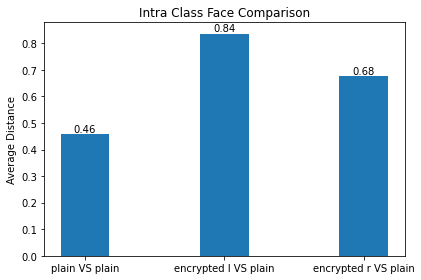

In [6]:
######################################################
# INTRA CLASS - FACE COMPARISON - PLOT
######################################################


labels = ['plain VS plain', 'encrypted l VS plain', 'encrypted r VS plain']
values = [avg_distance_pp, avg_distance_elp, avg_distance_erp]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values, width, align='edge')

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
ax.set_ylabel('Average Distance')
ax.set_title('Intra Class Face Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# average distancesS
ax.bar_label(rects1, fmt='%.2f')



fig.tight_layout()

plt.show()